In [1]:
%pylab inline
import numpy as np
import pylab as pl
from IPython.display import display, clear_output
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)
random_1 = np.random.randn(2,100)
random_2 = np.random.randn(2,100) + 2
random_1.shape

(2, 100)

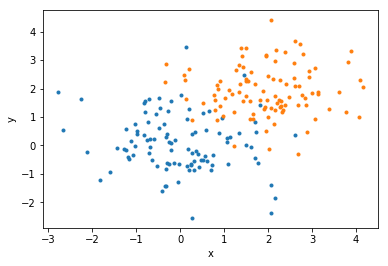

In [3]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [4]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

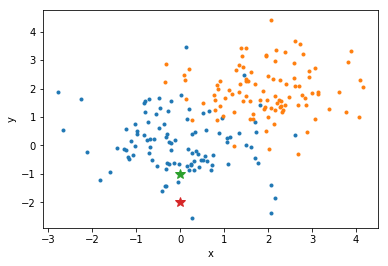

In [5]:
centers = np.array([[0.,-1.], [0,-2]]) 

pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [6]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [7]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [8]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence

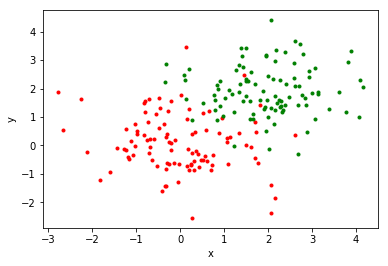

In [9]:
fig, ax = plt.subplots()
a, = ax.plot([],[],"*",markersize=12)
b, = ax.plot([],[],"*",markersize=12)
ax.set_xlabel("x")
ax.set_ylabel("y")
t1, = ax.plot(random_1[0], random_1[1], 'r.')
t2, = ax.plot(random_2[0], random_2[1], 'g.')

In [10]:
newc_x1 = []
newc_x2 = []
newc_y1 = []
newc_y2 = []
centers = np.array([[0.,-1.], [0,-2]]) 
iteration = 0
iterate = []

while((centers != newc).all()):
    iterate.append(iteration)
    print(iteration)
    print('old {}'.format(centers))
    centers = newc
    print('new {}'.format(centers))
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])    
    
    newc = np.array(
        [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
         np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print('newc {}'.format(newc))
    newc_x1.append(newc[0,0])
    newc_x2.append(newc[1,0])
    newc_y1.append(newc[0,1])
    newc_y2.append(newc[1,1])
    
    iteration += 1

0
old [[ 0. -1.]
 [ 0. -2.]]
new [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]
newc [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]]
1
old [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]
new [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]]
newc [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]]
2
old [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]]
new [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]]
newc [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]]
3
old [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]]
new [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]]
newc [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]]
4
old [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]]
new [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]]
newc [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]]
5
old [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]]
new [[  1.96325332e+00   1.90823820e+00]
 [ -1.2610

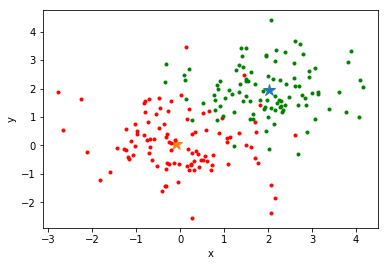

iteration: 7
This is the final center!


In [11]:
for i in range(len(iterate)):
    a.set_data(newc_x1[i],newc_y1[i])
    b.set_data(newc_x2[i],newc_y2[i])
    time.sleep(2)
    clear_output(wait=True)
    display(fig)
    print('iteration: {}'.format(i))
print ('This is the final center!')
pl.show()